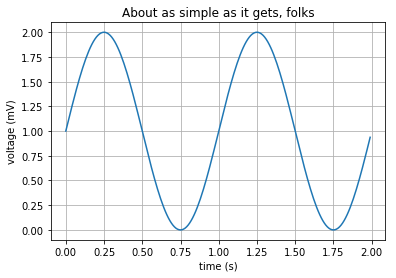

In [2]:
# Test
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [24]:
# Gaussian elimination for solving systems of linear equations
# https://en.wikipedia.org/wiki/LU_decomposition
# https://en.wikipedia.org/wiki/Gaussian_elimination
# U*X=Y --> rezolvarea sistemului Gauss

from numpy import dot, matrix, zeros

def rezgauss(a, b):
  n = len(b) # 3
  x = zeros(n)
  for i in range(0, n-1): # i: 0 ; 1
    
    for k in range(i + 1, n): # k: 1, 2 ; 2 
      if a[k, i] != 0.0 and a[i, i] != 0.0:
        lam = a[k, i] / a[i, i]
      
        # schimba coeficientii liniei 2 si apoi 3
        a[k, i:n] = lam * a[i, i:n] - a[k, i:n]
        
        # schimba valoarea de dupa egal a liniei 2 si apoi 3
        b[k] = lam * b[i] - b[k]

  for k in range (n-1, -1 , -1): # [2..-1] , 2, 1, 0
    x[k] = (b[k] - dot(a[k, k+1:n], x[k+1:n]))/a[k,k]
    
  return x
    
a = matrix([
  [3.0, 10.0, -4.0],
  [20.0, 2.0, 3.0],
  [2.0, -1.0, 5.0]
])

b = matrix([
  [9.0],
  [25.0],
  [6.0]
])

print(rezgauss(a, b))

[1. 1. 1.]


In [10]:
# Doolittle decomposition 
# https://en.wikipedia.org/wiki/LU_decomposition#Doolittle_algorithm

# U*X = Y --> rezolvarea sistemului Gauss
# A = L * U, unde U este Matricea Gauss= (u11,u12,u13,u22,u23,u33)
# L este matrix([[1,0,0],[l21,1,0],[l31,l32,1]])

#Matricea L
#(  1    0   0)
#( l21   1   0)
#( l31  l32  1)

#Matricea Gauss
#(u11  u12  u13)
#( -   u22  u23)
#( -    -   u33)

#DOOLITTLE

from numpy import dot, matrix, zeros

def descompLU(a):
  n = len(a)
  for i in range(0,n-1):
    for k in range(i + 1,n):
      if a[k,i] != 0.0 and a[i,i] != 0.0:
        l = a[k,i] / a[i,i]
        a[k,i+1:n] = a[k,i+1:n] - l*a[i,i+1:n]
        a[k,i]= l
  return a
  
def rezDoolittle(a,b):
  # A = L * U
  a = descompLU(a)
  n = len(a)
  x = zeros(n)
      
  # L * Y = b
  for k in range(1,n):
    b[k] = b[k] - dot(a[k,0:k], b[0:k])
    
  print("Y=", b)

  # U * X = Y
  for k in range (n-1, -1 , -1):
    x[k] = (b[k] - dot(a[k,k+1:n], x[k+1:n]))/a[k,k]
  return x
    
a = matrix([
  [1.0, 2.0, 4.0],
  [3.0, 8.0, 14.0],
  [2.0, 6.0, 13.0]
])

b = matrix([
  [3.0],
  [13.0],
  [4.0]
])

print("X=", rezDoolittle(a, b))



Y= [[ 3.]
 [ 4.]
 [-6.]]
X= [ 3.  4. -2.]


In [20]:
# Cholesky decomposition
# https://en.wikipedia.org/wiki/Cholesky_decomposition

from math import sqrt
from numpy import matrix, dot, transpose, zeros
import sys

def cholescki(a):
    n=len(a)
    for k in range(n):
        if a[k,k] - dot(a[k,0:k],transpose(a[k,0:k])) < 0:
            print('Matricea nu este pozitiv definita')
            sys.exit()
        a[k,k]= sqrt(a[k,k] - dot(a[k,0:k],transpose(a[k,0:k])))
        for i in range(k+1,n):
            a[i,k]=(a[i,k]-dot(a[i,0:k],transpose(a[k,0:k])))/a[k,k]
    for k in range(1,n):
        a[0:k,k]=0.0
    return a

def rezCholescki(L,b):
    n=len(b)
    x=zeros(n)
    #solutia [L]{y}={b}
    for k in range(n):
        b[k]=(b[k] -dot(L[k,0:k],b[0:k]))/L[k,k]
        
    print("Y=", b)
    # solutia [L_transpsose]{x}={y}
    for k in range(n-1,-1,-1):
        x[k]=(b[k]-dot(transpose(L[k+1:n,k]), x[k+1:n]))/L[k,k]
    return x

a = matrix([
    [10.0, 5.0, 2.0],
    [5.0, 3.0, 2.0],
    [2.0, 2.0, 3.0]
])
b = matrix([
    [1.0],
    [3.0],
    [2.0]
])
L=cholescki(a)
x=rezCholescki(L, b)
print("L=", L)
print("X=", x)

Y= [[ 0.31622777]
 [ 3.53553391]
 [-4.13118224]]
L= [[3.16227766 0.         0.        ]
 [1.58113883 0.70710678 0.        ]
 [0.63245553 1.41421356 0.77459667]]
X= [-6.66666667 15.66666667 -5.33333333]


In [46]:
# Newton's divided differences interpolation polynomial
# https://en.wikipedia.org/wiki/Newton_polynomial
# https://en.wikipedia.org/wiki/Divided_differences

puncte = {
    -1.0: 2.0, 
    0.0: 1.0, 
    1.0: 0.0, 
    2.0: -1.0
}
x=sorted(puncte)
print(x)
delta = []

# [2, 1, 0, -1]
for i in (x):
  delta.append(puncte[i])

def divizate(x,delta):
  n=len(x) # 4
  for step in range(1,n): # 1, 2, 3 
    for i in range(n-1,step-1,-1): # 3, 2, 1; 3, 2; 3
      delta[i] = (delta[i]-delta[i-1])/(x[i]-x[i-step])
  return delta

def eval(x, z, delta):
  n = len(x)-1 # 3
  p = delta[n]
  print(delta, "p=", p)
  for i in range (n-1, -1,-1): # 2, 1, 0
    # print(i, x[i], delta[i], p)
    p = p*(z - x[i]) + delta[i]
  return (p)
  
delta = divizate(x,delta)
print(eval(x, 2.5, delta))

[-1.0, 0.0, 1.0, 2.0]
[2.0, -1.0, 0.0, 0.0] p= 0.0
-1.5


In [36]:
# Lagrange interpolation
# https://en.wikipedia.org/wiki/Lagrange_polynomial

from numpy import ones

def lagrange(puncte,x):
    vect = sorted(puncte)
    n = len(vect)
    l = ones(n)
    for i in range(n): # 0, 1, 2, 3
        for j in range(n): # 0, 1, 2, 3
            if i!=j:
                l[i] = l[i] * ((x-vect[j])/(vect[i]-vect[j]))
    p = 0
    for i in range(n):
        y = puncte[vect[i]]
        p = p + l[i] * y
    return p

puncte = {
    -1.0: 2.0, 
    0.0: 1.0, 
    1.0: 0.0, 
    2.0: -1.0
}
x = 1.7

print(lagrange(puncte,x))


-0.7


In [22]:
# Bisection method
# https://en.wikipedia.org/wiki/Bisection_method

from math import log,ceil

def bisectie(f,a,b,tol):
  fa=f(a)
  fb=f(b)
  if fa*fb > 0.0:
    return (print("Nu exista solutie"))
  elif a == 0.0:
    print(a , "este solutie")
  elif b==0.0:
    print(b ,  "este solutie")
  elif fa*fb < 0.0:
    n = ceil ( (1/log(2)) * log((b-a)/tol) )
    print("n=", n)
    for i in range (n):
      m= (a+b)/2
      print("i=", i + 1, "m=", m)
      if fa*f(m)  < 0.0:
        b = m
      else:
        a = m
    return (m)

def f(x):
  return (x**6) - x - 1

bisectie(f, 1, 2, 1.0e-3)

n= 10
i= 1 m= 1.5
i= 2 m= 1.25
i= 3 m= 1.125
i= 4 m= 1.1875
i= 5 m= 1.15625
i= 6 m= 1.140625
i= 7 m= 1.1328125
i= 8 m= 1.13671875
i= 9 m= 1.134765625
i= 10 m= 1.1337890625


1.1337890625

In [7]:
# Secant method
# https://en.wikipedia.org/wiki/Secant_method

from math import ceil,log,exp,sin,fabs

toleranta = 1.0e-3

def f(x):
  return x - exp(-x)

a=0.0
b=1.0
fa=f(a)
fb=f(b)

print("Initial f(",a,") = ",fa,", iar f(",b,") = ",fb)

if fa==0:
  print("Solutia = a = ",a)
  exit(0)
    
if fb==0:
  print("Solutia = b = ",b)
  exit(0)
    
if fa*fb > 0:
  print("Solutia nu se afla in intervalul dat")
  exit(0)
    
m=0
fm=0
while 1:
  m = a - ( (b-a) * fa / (fb-fa) );
  fm = f(m)
    
  if fm == 0:
    print("Solutia este m = ",m," iar f(",m,") = ",fm)
    exit(0)
    
  # print("fm=", fm)
  if fabs(fm) < toleranta:
    break
    
  print("m = ",m,",iar f(",m,") = ",fm)

  if fa*fm < 0:
    b = m
    fb = fm
    print("Impart intervalul pentru partea stanga")
  else:
    a = m
    fa = fm
    print("Impart intervalul pentru partea dreapta")
    
  print("a = ",a,", b = ",b)

print("Solutia aproximata este m = ",m,", iar f(",m,") = ",fm)

Initial f( 0.0 ) =  -1.0 , iar f( 1.0 ) =  0.6321205588285577
m =  0.6126998367802821 ,iar f( 0.6126998367802821 ) =  0.07081394787317097
Impart intervalul pentru partea stanga
a =  0.0 , b =  0.6126998367802821
m =  0.5721814120905075 ,iar f( 0.5721814120905075 ) =  0.007888272855299805
Impart intervalul pentru partea stanga
a =  0.0 , b =  0.5721814120905075
Solutia aproximata este m =  0.567703214235785 , iar f( 0.567703214235785 ) =  0.000877391979772324


In [18]:
# Simpson's rule
# https://en.wikipedia.org/wiki/Simpson%27s_rule

import math

def f(x):
    return x ** 2

a=0.0
b=2.0;
n=4

if n % 2 == 1:
    print("Trebuie ales un N par")
    exit(1)
    
h = (b-a) / n
s = f(a)

for i in range(1, n):
    # impar
    if i % 2 == 1:
        s = s + 4 * f(a + i*h)
    else: # par
        s = s + 2 * f(a + i*h)
        
s = s + f(b)

print(s * ( (b - a) / (3.0 * n) )," pentru n = ",n)


2.6666666666666665  pentru n =  4


In [12]:
x = 13.946
print("{0:.2f}".format(x))

13.95


In [21]:
# Trapezoidal rule
# https://en.wikipedia.org/wiki/Trapezoidal_rule

import math

def f(x):
    return x ** 2

a = 0.0
b = 2.0;
n = 4
h = (b - a) / n

# primul termen
s = f(a)

for i in range(1, n):
    s = s + 2 * f(a + i * h)
    
# ultimul termen
s = s + f(b)

print(s * ( (b - a) / (2.0 * n) ) )

2.75


# References
- [Numerical Methods in Engineering with Python 3](https://doc.lagout.org/programmation/python/Numerical%20Methods%20in%20Engineering%20with%20Python%203%20%5BKiusalaas%202011-02-21%5D.pdf)